In [84]:
# neccessary imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
# Import libraries for data processing & modeling

from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from imblearn.over_sampling import SMOTE

In [86]:
data=pd.read_csv(r'D:\PW\projects\Insurance Fraud\notebooks\insuranceFraud.csv')

<Axes: xlabel='fraud_reported', ylabel='count'>

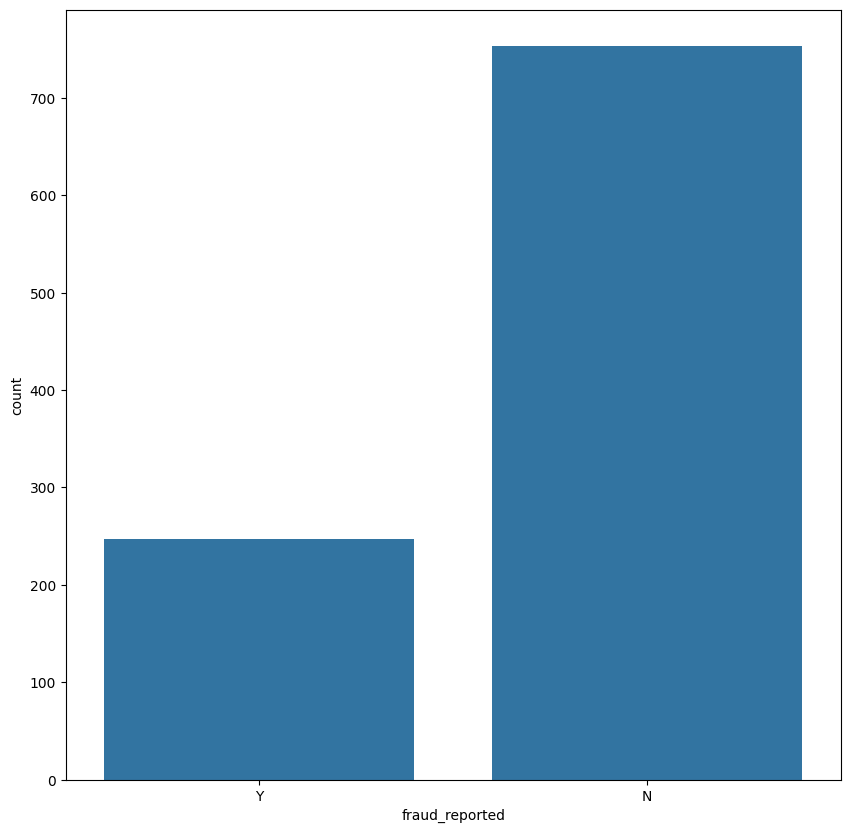

In [87]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='fraud_reported',data=data)

In [88]:
# Having a look at the data
data['fraud_reported'].value_counts()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

In [89]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,09-06-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [90]:
# In this dataset missing values have been denoted by '?'
# we are replacing ? with NaN for them to be imputed down the line.
data=data.replace('?',np.nan)

In [91]:
# list of columns not necessary for pfrediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [92]:
# dropping the unnecessary columns
data.drop(columns=cols_to_drop,inplace=True)

In [93]:
# checking the data after dropping the columns
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [94]:
# checking for missing values
data.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital_gains                    0
capital_loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [95]:
# checking for th number of categorical and numerical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital_gains                1000 non-null   int64  
 11  capital_loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [96]:
# As the columns which have missing values, they are only categorical, we'll use the categorical imputer
# Importing the categorical imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform

<bound method TransformerMixin.fit_transform of SimpleImputer(strategy='most_frequent')>

In [97]:
# imputing the missing values from the column

data[['collision_type']]=imputer.fit_transform(data[['collision_type']])
data[['property_damage']]=imputer.fit_transform(data[['property_damage']])
data[['police_report_available']]=imputer.fit_transform(data[['police_report_available']])

In [98]:
# Extracting the categorical columns
categorical_data = data.select_dtypes(include=['object']).copy()

In [99]:
categorical_data.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,NaN,NO,NO,N


In [100]:
categorical_data.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

Checking the categorical values present in the columns to decide for getDummies encode or custom mapping to convert categorical data to numeric one

In [101]:
categorical_data['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [102]:
categorical_data['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [103]:
categorical_data['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [104]:
categorical_data['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

In [105]:
categorical_data['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [106]:
# custom mapping for encoding
categorical_data['policy_csl'] = categorical_data['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
categorical_data['insured_education_level'] = categorical_data['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7}) # ordinal encoding
categorical_data['incident_severity'] = categorical_data['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
categorical_data['insured_sex'] = categorical_data['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
categorical_data['property_damage'] = categorical_data['property_damage'].map({'NO' : 0, 'YES' : 1})
categorical_data['police_report_available'] = categorical_data['police_report_available'].map({'NO' : 0, 'YES' : 1})
categorical_data['fraud_reported'] = categorical_data['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [107]:
# auto encoding of categorical variables
for col in categorical_data.drop(columns=['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available','fraud_reported']).columns:
    categorical_data= pd.get_dummies(categorical_data, columns=[col], prefix = [col], drop_first=True)

In [108]:
# data fter encoding
categorical_data.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1,1,1,False,True,False,...,False,False,False,True,False,False,True,False,False,True
1,2.5,1,6,2,0,0,1,False,False,False,...,False,False,False,False,True,True,False,False,False,True
2,1.0,0,7,2,0,0,0,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,2.5,0,7,3,0,0,1,True,False,False,...,True,False,False,True,False,False,False,False,False,True
4,5.0,1,5,2,0,0,0,False,False,False,...,True,False,False,False,True,True,False,False,False,False


In [109]:
# extracting the numerical columns
numerical_data = data.select_dtypes(include=['int64']).copy()

In [110]:
numerical_data.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital_gains', 'capital_loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [111]:
numerical_data.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital_gains,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [112]:
# combining the Numerical and categorical dataframes to get the final dataset
final_data=pd.concat([numerical_data,categorical_data], axis=1)

In [113]:
final_data.shape

(1000, 47)

In [114]:
final_data.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital_gains,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,...,False,False,False,True,False,False,True,False,False,True
1,228,42,2000,5000000,0,0,8,1,0,0,...,False,False,False,False,True,True,False,False,False,True
2,134,29,2000,5000000,35100,0,7,3,2,3,...,False,False,False,False,False,True,False,False,False,True
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,True,False,False,True,False,False,False,False,False,True
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,True,False,False,False,True,True,False,False,False,False


In [115]:
# separating the feature and target columns
x=final_data.drop('fraud_reported',axis=1)
y=final_data['fraud_reported']

In [116]:
import matplotlib.pyplot as plt
%matplotlib  inline

(array([349.,   0.,   0., 351.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

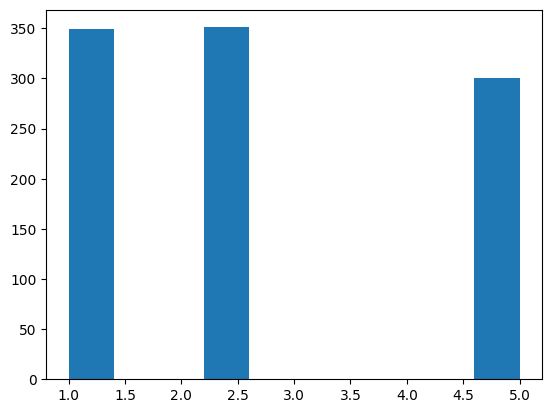

In [117]:
# we'll look at the distribution of data in some columns now
plt.hist(final_data['policy_csl'])
# we  can see that for almost all categories of CSL the data is uniformly distributed

In [118]:
import seaborn as sns

C:\Users\dalal\AppData\Local\Temp\ipykernel_20424\611864248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_data['insured_sex'])


<Axes: xlabel='insured_sex', ylabel='Density'>

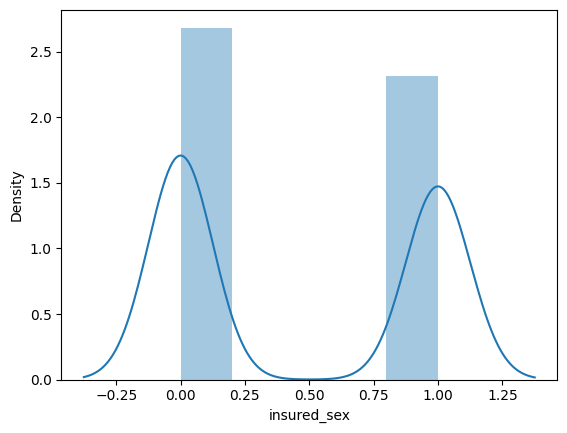

In [119]:
sns.distplot(final_data['insured_sex'])
# we  can see that for almost all categories of the gender of the insured the data is uniformly distributed

C:\Users\dalal\AppData\Local\Temp\ipykernel_20424\393251241.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_data['insured_education_level'])


<Axes: xlabel='insured_education_level', ylabel='Density'>

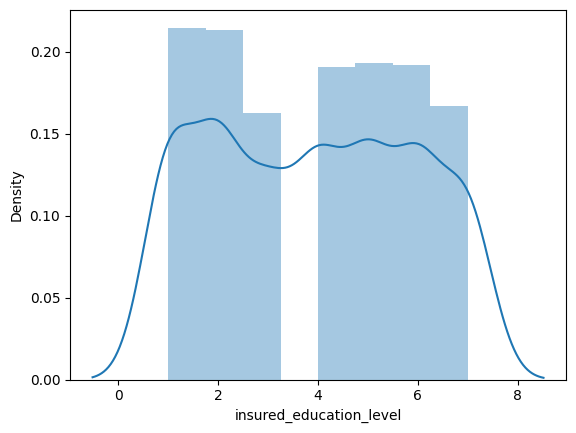

In [120]:
sns.distplot(final_data['insured_education_level'])
# we  can see that for almost all categories of the education level of the person insured the data is uniformly distributed

C:\Users\dalal\AppData\Local\Temp\ipykernel_20424\2126240593.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_data['incident_severity'])


'\nWe can see that there are least claims for trivial incidents,\nmost claims for minor incidents,\nand for major and Total loss incidents the claims are almost equal.\n'

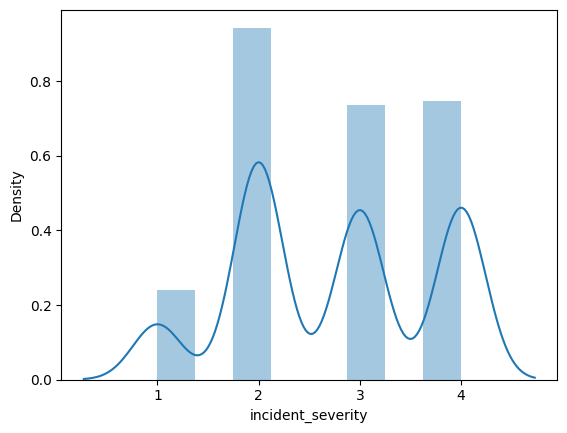

In [121]:
sns.distplot(final_data['incident_severity'])
"""
We can see that there are least claims for trivial incidents,
most claims for minor incidents,
and for major and Total loss incidents the claims are almost equal.
"""

In [122]:
numerical_data.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital_gains', 'capital_loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

<Axes: >

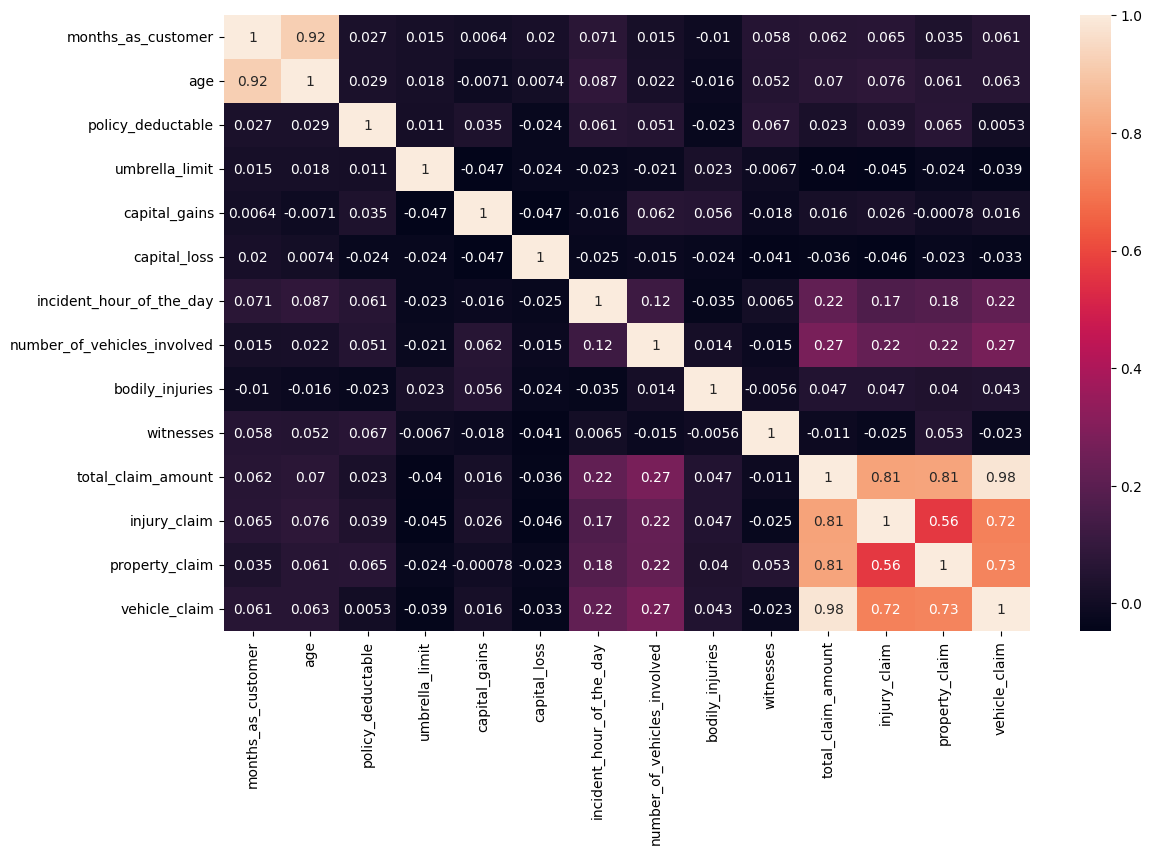

In [123]:
plt.figure(figsize=(13,8))
sns.heatmap(numerical_data.corr(), annot=True )

From the plot above, we can see that there is high correlation between Age and the number of months. we'll drop the age column.
Also, there is high correlation between total claim amount, injury claim,vehicle claim, and property claim as total claim is the sum of all others. So, we'll drop the total claim column.

In [124]:
x.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital_gains', 'capital_loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_csl', 'insured_sex', 'insured_education_level',
       'incident_severity', 'property_damage', 'police_report_available',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_

In [125]:
x.drop(columns=['age','total_claim_amount'], inplace=True)

In [126]:
x1=x[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital_gains', 'capital_loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [127]:
x1.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital_gains', 'capital_loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [128]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [129]:
scaler.fit(x1)

StandardScaler()

In [130]:
standardized_data=scaler.transform(x1)

In [131]:
print(standardized_data)

[[ 1.07813958 -0.22238259 -0.47947582 ... -0.18928317  1.16550497
   0.74965272]
 [ 0.2089946   1.41278352  1.69798022 ... -1.36382194 -1.37269599
  -1.82334593]
 [-0.60800168  1.41278352  1.69798022 ...  0.05464372 -0.73607206
  -0.78556451]
 ...
 [-0.64276748 -1.03996564  0.8269978  ...  0.01364761  0.0208261
   0.77190224]
 [ 2.20802805  1.41278352  1.69798022 ... -0.45370813 -0.45197603
  -0.07357971]
 [ 2.19064515 -0.22238259 -0.47947582 ... -1.42941572 -1.34366428
  -1.81434017]]


In [132]:
x2= pd.DataFrame(data=standardized_data, columns=x1.columns,index=x.index)
x2.shape

(1000, 12)

In [133]:
# splitting the data for model training

# splitting the data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y, random_state=2)

In [134]:
print(x.shape, x_train.shape, x_test.shape)

(1000, 44) (750, 12) (250, 12)


In [135]:
print(y.shape, y_train.shape, y_test.shape)

(1000,) (750,) (250,)


In [136]:
x_train.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital_gains', 'capital_loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [137]:
x_test.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital_gains', 'capital_loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [138]:
total_majority = np.sum(y_train == 0)
total_minority = np.sum(y_train == 1)

weight_majority = 1
weight_minority = 3.05
class_weights = {0: weight_majority, 1: weight_minority}

In [139]:
# first using the Support vector classifier for model training
from sklearn.svm import SVC
classifier=svm.SVC(kernel='linear', class_weight=class_weights,random_state=2)

In [140]:
y_prediction = classifier.fit(x_train, y_train)

In [141]:
y_prediction

SVC(class_weight={0: 1, 1: 3.05}, kernel='linear', random_state=2)

In [142]:
from sklearn.metrics import accuracy_score

In [143]:
#accuracy score on the training model

X_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [144]:
print("Accuracy score of the training model",training_data_accuracy)

Accuracy score of the training model 0.5693333333333334


In [145]:
x_test.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital_gains', 'capital_loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [146]:
'''x_test.drop(columns=['policy_csl',
       'insured_sex', 'insured_education_level', 'incident_severity',
       'property_damage', 'police_report_available',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_relationship_not-in-family',
       'insured_relationship_other-relative', 'insured_relationship_own-child',
       'insured_relationship_unmarried', 'insured_relationship_wife',
       'incident_type_Parked Car', 'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft', 'collision_type_Rear Collision',
       'collision_type_Side Collision', 'authorities_contacted_Fire',
       'authorities_contacted_None', 'authorities_contacted_Other',
       'authorities_contacted_Police'],
      inplace=True)'''

"x_test.drop(columns=['policy_csl',\n       'insured_sex', 'insured_education_level', 'incident_severity',\n       'property_damage', 'police_report_available',\n       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',\n       'insured_occupation_exec-managerial',\n       'insured_occupation_farming-fishing',\n       'insured_occupation_handlers-cleaners',\n       'insured_occupation_machine-op-inspct',\n       'insured_occupation_other-service',\n       'insured_occupation_priv-house-serv',\n       'insured_occupation_prof-specialty',\n       'insured_occupation_protective-serv', 'insured_occupation_sales',\n       'insured_occupation_tech-support',\n       'insured_occupation_transport-moving',\n       'insured_relationship_not-in-family',\n       'insured_relationship_other-relative', 'insured_relationship_own-child',\n       'insured_relationship_unmarried', 'insured_relationship_wife',\n       'incident_type_Parked Car', 'incident_type_Single Vehicle Collision'

In [147]:
x_train.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital_gains', 'capital_loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [148]:
x_test.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital_gains', 'capital_loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [149]:
X_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [150]:
print("Accuracy score of the testing model",test_data_accuracy)

Accuracy score of the testing model 0.58


In [151]:
''' 228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550 N
    137,1000,0,0,-77000,0,3,0,0,21450,7150,50050 N
    165,1000,0,0,0,23,3,2,2,9380,9380,32830 N
    27,500,0,0,0,21,1,1,1,2770,2770,22160 N
    103,1000,6000000,0,0,21,1,1,0,12820,6410,57690

    '''

' 228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550 N\n    137,1000,0,0,-77000,0,3,0,0,21450,7150,50050 N\n    165,1000,0,0,0,23,3,2,2,9380,9380,32830 N\n    27,500,0,0,0,21,1,1,1,2770,2770,22160 N\n    103,1000,6000000,0,0,21,1,1,0,12820,6410,57690\n\n    '

In [152]:
input_data = (31,2000,4000000,46800,-87300,10,1,2,0,5300,10600,47700)

#changing the input data into the numpy array data
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instances
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

#standization of input data
std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction  = classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print("Fraud is not reported")
else:
  print("Fraud is reported")

[[-1.50322101  1.41278352  1.26248901  0.77800657 -2.15401251 -0.23661838
  -0.82386498  1.22969265 -1.33869959 -0.43730968  0.66367112  0.51762196]]
[1]
Fraud is reported


c:\Users\dalal\.conda\envs\insurance\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\dalal\.conda\envs\insurance\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [153]:
import pickle

In [154]:
filename = "trained_model.sav"
pickle.dump(classifier,open(filename,"wb"))

In [155]:
loaded_model = pickle.load(open("trained_model.sav","rb"))

In [156]:
pickle.dump(scaler,open("standardized_1.pkl","wb"))
loaded_model1 = pickle.load(open("standardized_1.pkl","rb"))

In [157]:
input_data = (31,2000,4000000,46800,-87300,10,1,2,0,5300,10600,47700)

#changing the input data into the numpy array data
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instances
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

#standization of input data
std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction  = loaded_model.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print("Fraud is not reported")
else:
  print("Fraud is reported")

[[-1.50322101  1.41278352  1.26248901  0.77800657 -2.15401251 -0.23661838
  -0.82386498  1.22969265 -1.33869959 -0.43730968  0.66367112  0.51762196]]
[1]
Fraud is reported


c:\Users\dalal\.conda\envs\insurance\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\dalal\.conda\envs\insurance\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
